In [1]:
import pandas as pd
import numpy as np
import wget
from tqdm import tqdm
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

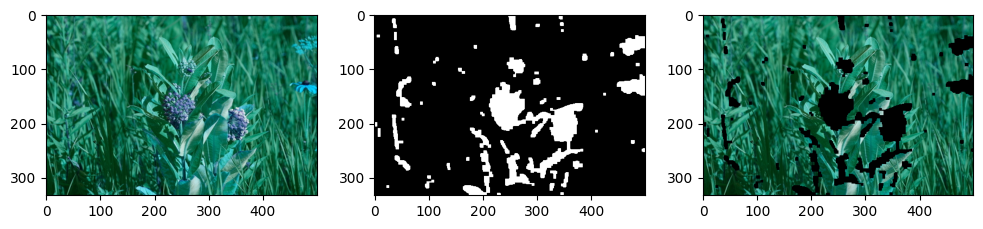

In [2]:
img = cv2.imread("milkweed/images/4198.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

low_green = np.array([30, 0, 0])
high_green = np.array([95, 255, 255])

mask = cv2.inRange(hsv, low_green, high_green)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel) 
mask = cv2.erode(mask, kernel) 
mask = cv2.dilate(mask, kernel) 

res = cv2.bitwise_and(img,img, mask= mask)

nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(mask)
sizes = stats[:, -1]
sizes = sizes[1:]
nb_blobs -= 1

min_size = 20500  

im_result = np.zeros_like(im_with_separated_blobs)
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        im_result[im_with_separated_blobs == blob + 1] = 255

res = cv2.bitwise_and(img,img, mask= np.array(im_result).astype(np.uint8))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,10))
fig.tight_layout()
ax1.imshow(img)
ax2.imshow(mask, cmap="Greys")
ax3.imshow(res)

(-0.5, 499.5, 332.5, -0.5)

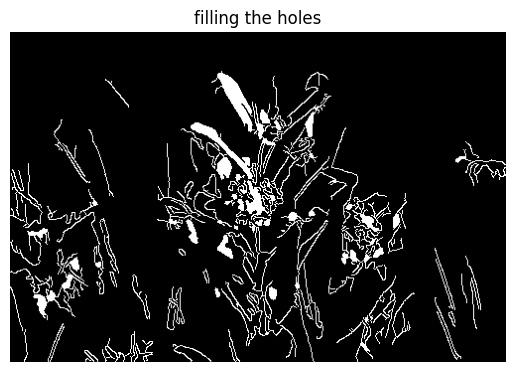

In [3]:
from scipy import ndimage as ndi

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=400) 

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots()
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

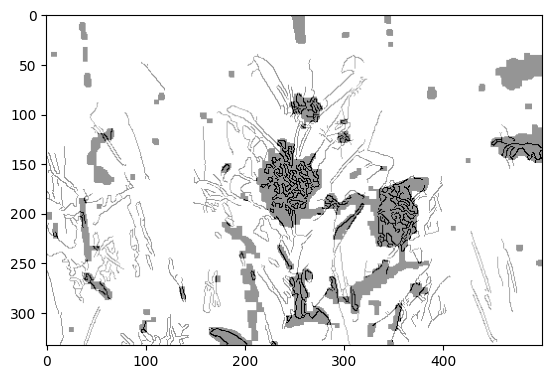

In [4]:

plt.imshow(255-im_result+edges, cmap='Greys')
plt.show()

In [5]:
mask2 = np.zeros_like(img)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:
        cv2.fillPoly(mask2, [contour], 255)

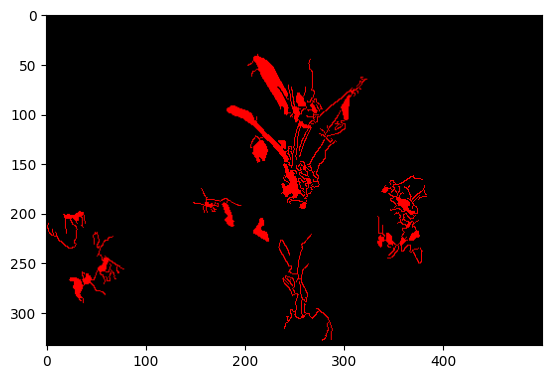

In [6]:
plt.imshow(mask2, cmap='Greys')
plt.show()